```
Theory

KNN 알고리즘의 직관은 모든 지도학습 알고리즘 중에서 가장 단순한 알고리즘 중 하나입니다.
새로운 데이터 포인트와 다른 모든 트레이닝 데이터 포인트의 거리를 계산합니다. 
거리는 유클리드 (Euclidean) 또는 맨해튼 (Manhattan) 등과 같은 임의의 타입 일 수있다. 
그 다음, K- 가장 가까운 데이터 포인트를 선택하는데, K는 임의의 정수일 수있다. 
마지막으로 K 데이터 포인트의 대부분이 속하는 클래스에 데이터 포인트를 지정합니다.

```

```
Pros and Cons of KNN (장단점)
이 섹션에서는 KNN 알고리즘을 사용하는 몇 가지 장단점에 대해 설명합니다.

Pros
1. 구현하기가 매우 쉽습니다.
2. 그것은 게으른 학습 알고리즘이기 때문에 실시간으로 만들기 전에 훈련이 필요하지 않습니다.
   예측. 이것은 KNN 알고리즘을 훈련이 필요한 다른 알고리즘, 예를 들어 SVM보다 훨씬 빠르게 만든다.(선형 회귀 등)
3. 알고리즘은 예측을하기 전에 교육을 필요로하지 않으므로 새로운 데이터를 원활하게 추가 할 수 있습니다. 
   KNN을 구현하는데 필요한 파라미터는 단지 2 개 뿐이다. 즉, K의 값 및 거리 함수 (예를 들어, 유클리드 또는 맨해튼 등)

Cons
1. KNN 알고리즘은 많은 차원의 차원에서 고차원 데이터와 잘 작동하지 않습니다.
   알고리즘이 각 차원에서 거리를 계산하는 것이 어려워집니다.
2. KNN 알고리즘은 큰 데이터 세트에 대해 높은 예측 비용을 갖는다. 이는 대규모 데이터 세트에서
   새 점과 기존 점 사이의 거리를 계산하는 것이 더 높습니다.
3. 마지막으로, KNN 알고리즘은 범주 형 특징을 잘 찾지 못한다.
   범주 형 기능이있는 차원 간 거리
  

```

### Importing Libraries


In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  

### Importing the Dataset

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names) 

In [3]:
dataset.head() 

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Preprocessing

In [4]:
X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, 4].values 

### Train Test Split

In [5]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)  

### Feature Scaling 

In [6]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

### Training and Predictions

In [7]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

첫 번째 단계는 `sklearn.neighbors` 라이브러리에서 `KNeighborsClassifier`클래스를 가져 오는 것입니다. 
두 번째 줄에서 이 클래스는 하나의 매개 변수, 즉 `n_neigbours`로 초기화됩니다. 이것은 기본적으로 K에 대한 값입니다.
K에 대한 이상적인 값은 없으며 테스트 및 평가 후에 선택됩니다. 
그러나 시작하려면 KNN 알고리즘에 대해 가장 일반적으로 사용되는 값인 것 같습니다.

In [8]:
y_pred = classifier.predict(X_test)  

### Evaluating the Algorithm

알고리즘을 평가할 때 confusion matrix, precision, recall and f1 score 장 일반적으로 사용되는 측정 항목입니다

`sklearn.metrics`의 `confusion_matrix` 및 `classification_report` 메소드를 사용하여 이러한 metrics을 계산할 수 있습니다.

In [9]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[ 8  0  0]
 [ 0 13  0]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         9

    avg / total       1.00      1.00      1.00        30



### Comparing Error Rate with the K Value

K의 최상의 가치를 찾는 한 가지 방법은 K 값의 그래프와 해당 데이터 세트의 오류 비율을 시각화하는 것입니다.

In [10]:
error = []

for i in range(1, 40+1):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

1에서 40 사이의 루프를 실행합니다. 각 반복에서 테스트 세트의 예상 값에 대한 평균 오류가 계산되고 결과가 error 리스트에 추가합니다.

Text(0,0.5,'Mean Error')

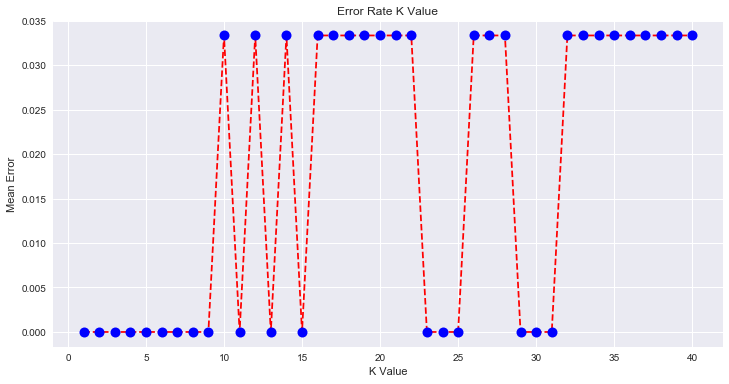

In [11]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40+1), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')

### MNIST

In [12]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [13]:
import numpy as np

X, y = mnist["data"], mnist["target"]
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [15]:
y_knn_pred = knn_clf.predict(X_test)

In [16]:
print(confusion_matrix(y_test, y_knn_pred))  
print(classification_report(y_test, y_knn_pred))

[[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [  11    8  991    2    1    0    1   15    3    0]
 [   0    3    3  976    1   13    1    6    3    4]
 [   3    7    0    0  944    0    4    2    1   21]
 [   5    0    0   12    2  862    4    1    2    4]
 [   5    3    0    0    3    2  945    0    0    0]
 [   0   22    4    0    3    0    0  988    0   11]
 [   8    3    5   13    6   12    5    5  913    4]
 [   5    7    3    9    7    3    1   10    2  962]]
             precision    recall  f1-score   support

        0.0       0.96      0.99      0.98       980
        1.0       0.95      1.00      0.98      1135
        2.0       0.98      0.96      0.97      1032
        3.0       0.96      0.97      0.97      1010
        4.0       0.98      0.96      0.97       982
        5.0       0.97      0.97      0.97       892
        6.0       0.98      0.99      0.98       958
        7.0       0.96      0.96      0.96  